In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv') # reading the data

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*It seems that there are no missing values in our data. Great, let's see the distribution of data:*

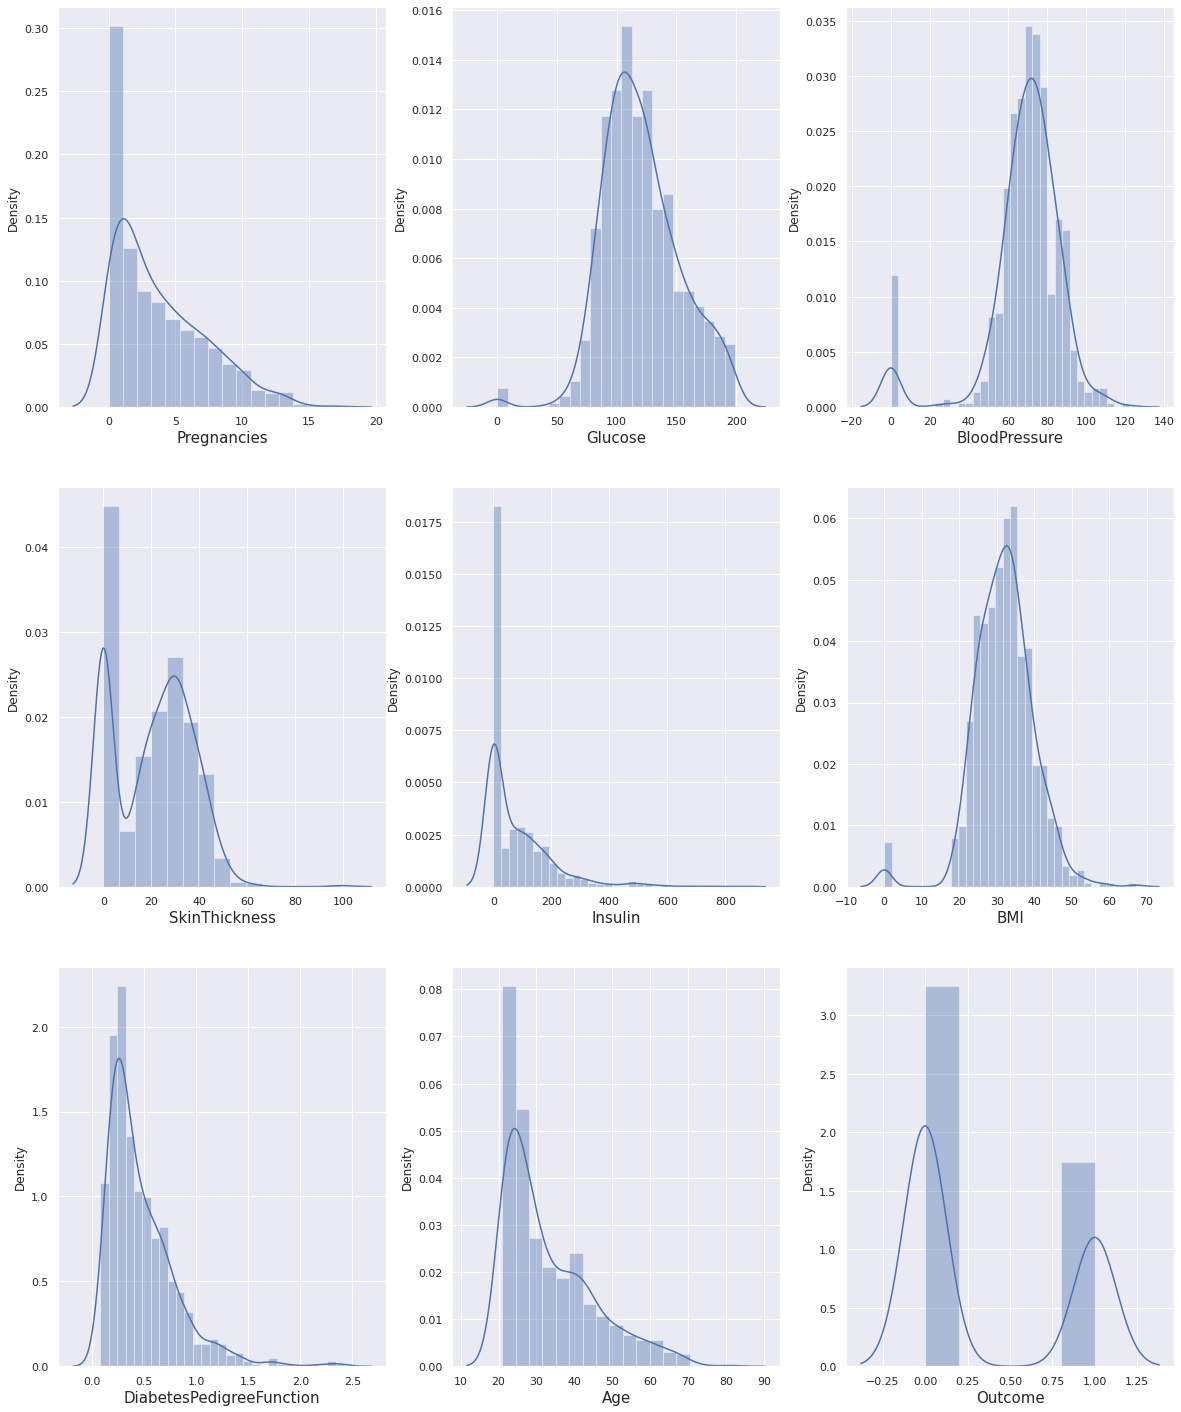

In [5]:
# let's see how data is distributed for every column.

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

We can see that there is some skewness in data.

Also, we can see that Glucose, Insulin, Skin Thickness, BMI and Blood Pressure which have value as 0. That's not possible. We can either remove such data or simply replace it with their respective mean values.

In [6]:
# replacing zero values with the mean of the columnn

data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

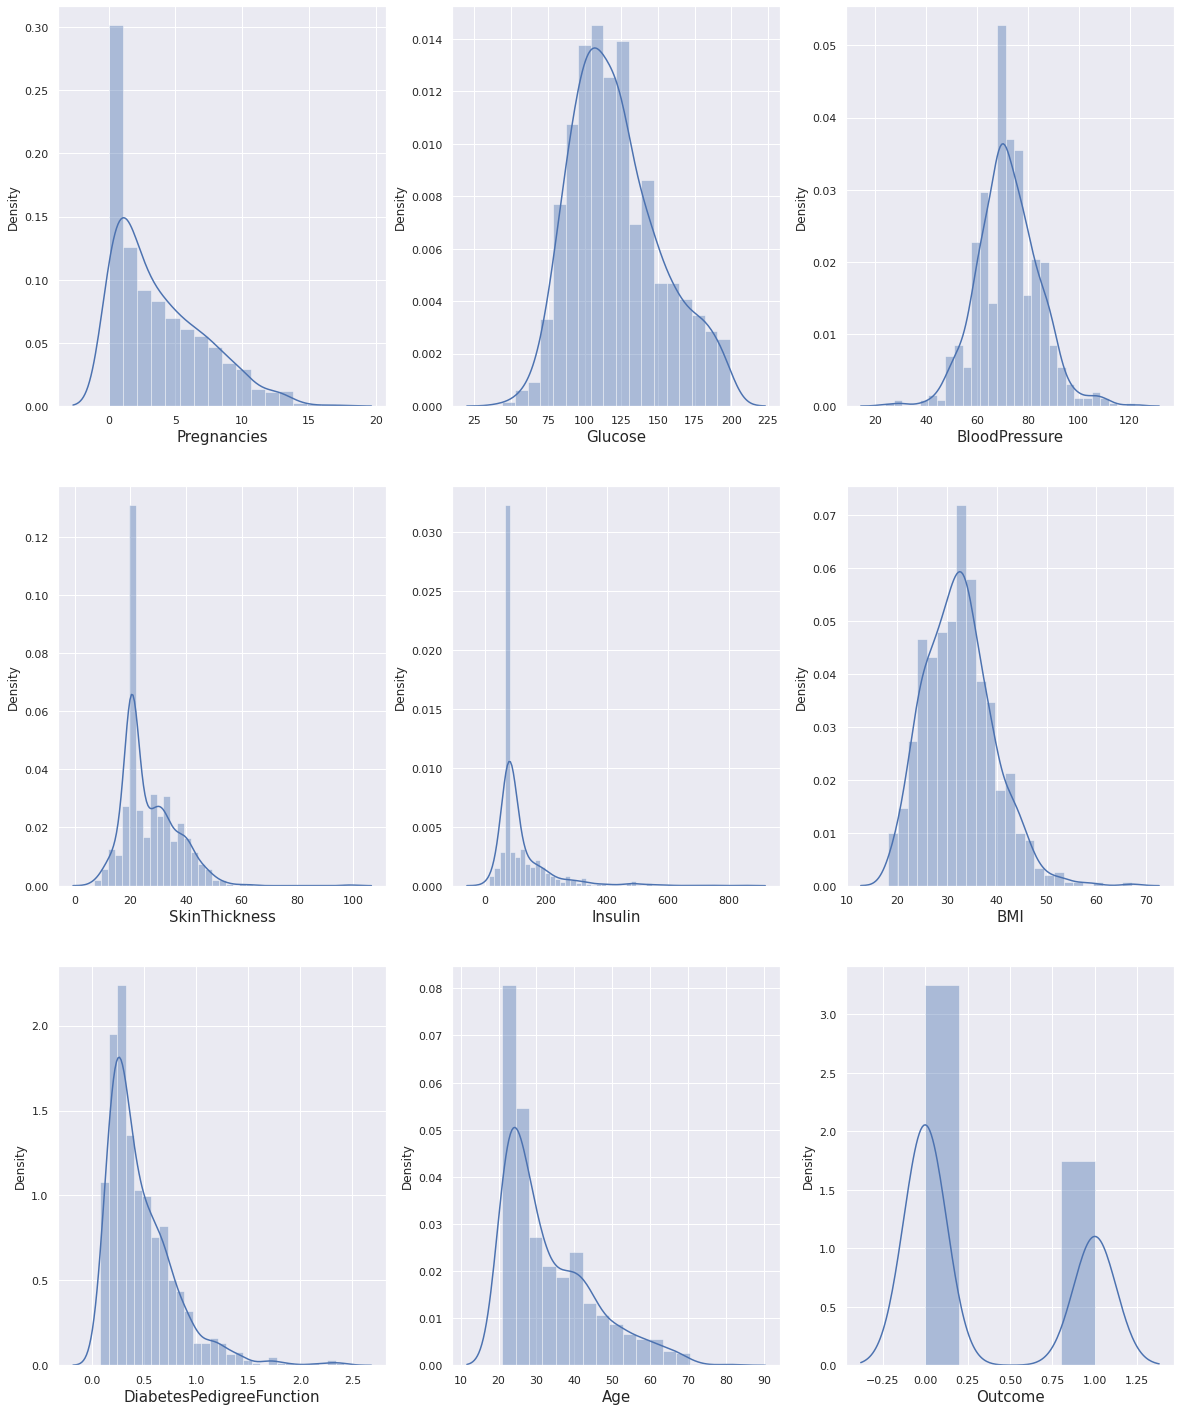

In [7]:
# again checking the data distribution

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

Now we have dealt with the 0 values and data looks better.But, there still are outliers present in some columns. Let's deal with them.

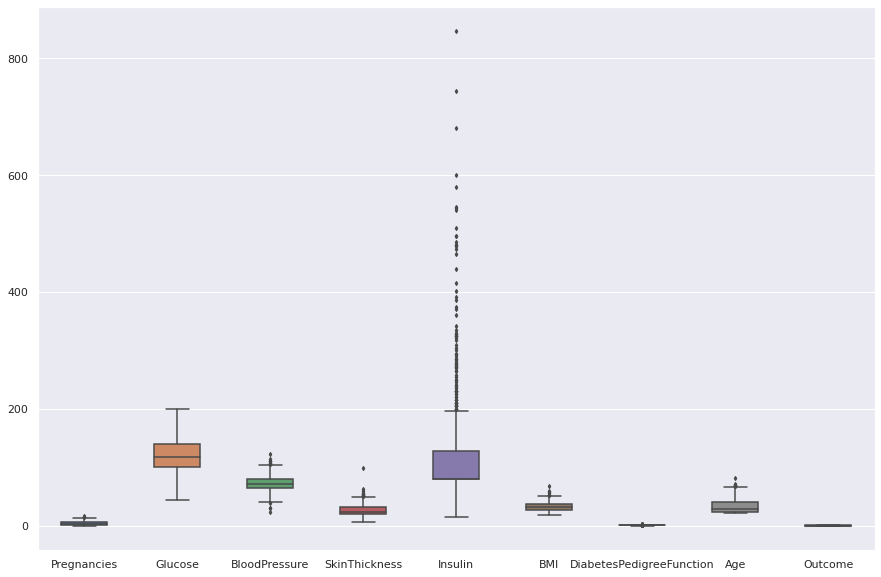

In [8]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [9]:
outlier = data['Pregnancies'].quantile(0.98)
# removing the top 2% data from the pregnancies column
data = data[data['Pregnancies']<outlier]

outlier = data['BMI'].quantile(0.99)
# removing the top 1% data from BMI column
data = data[data['BMI']<outlier]

outlier = data['SkinThickness'].quantile(0.99)
# removing the top 1% data from SkinThickness column
data = data[data['SkinThickness']<outlier]

outlier = data['Insulin'].quantile(0.95)
# removing the top 5% data from Insulin column
data = data[data['Insulin']<outlier]

outlier = data['DiabetesPedigreeFunction'].quantile(0.99)
# removing the top 1% data from DiabetesPedigreeFunction column
data = data[data['DiabetesPedigreeFunction']<outlier]

outlier = data['Age'].quantile(0.99)
# removing the top 1% data from Age column
data = data[data['Age']<outlier]

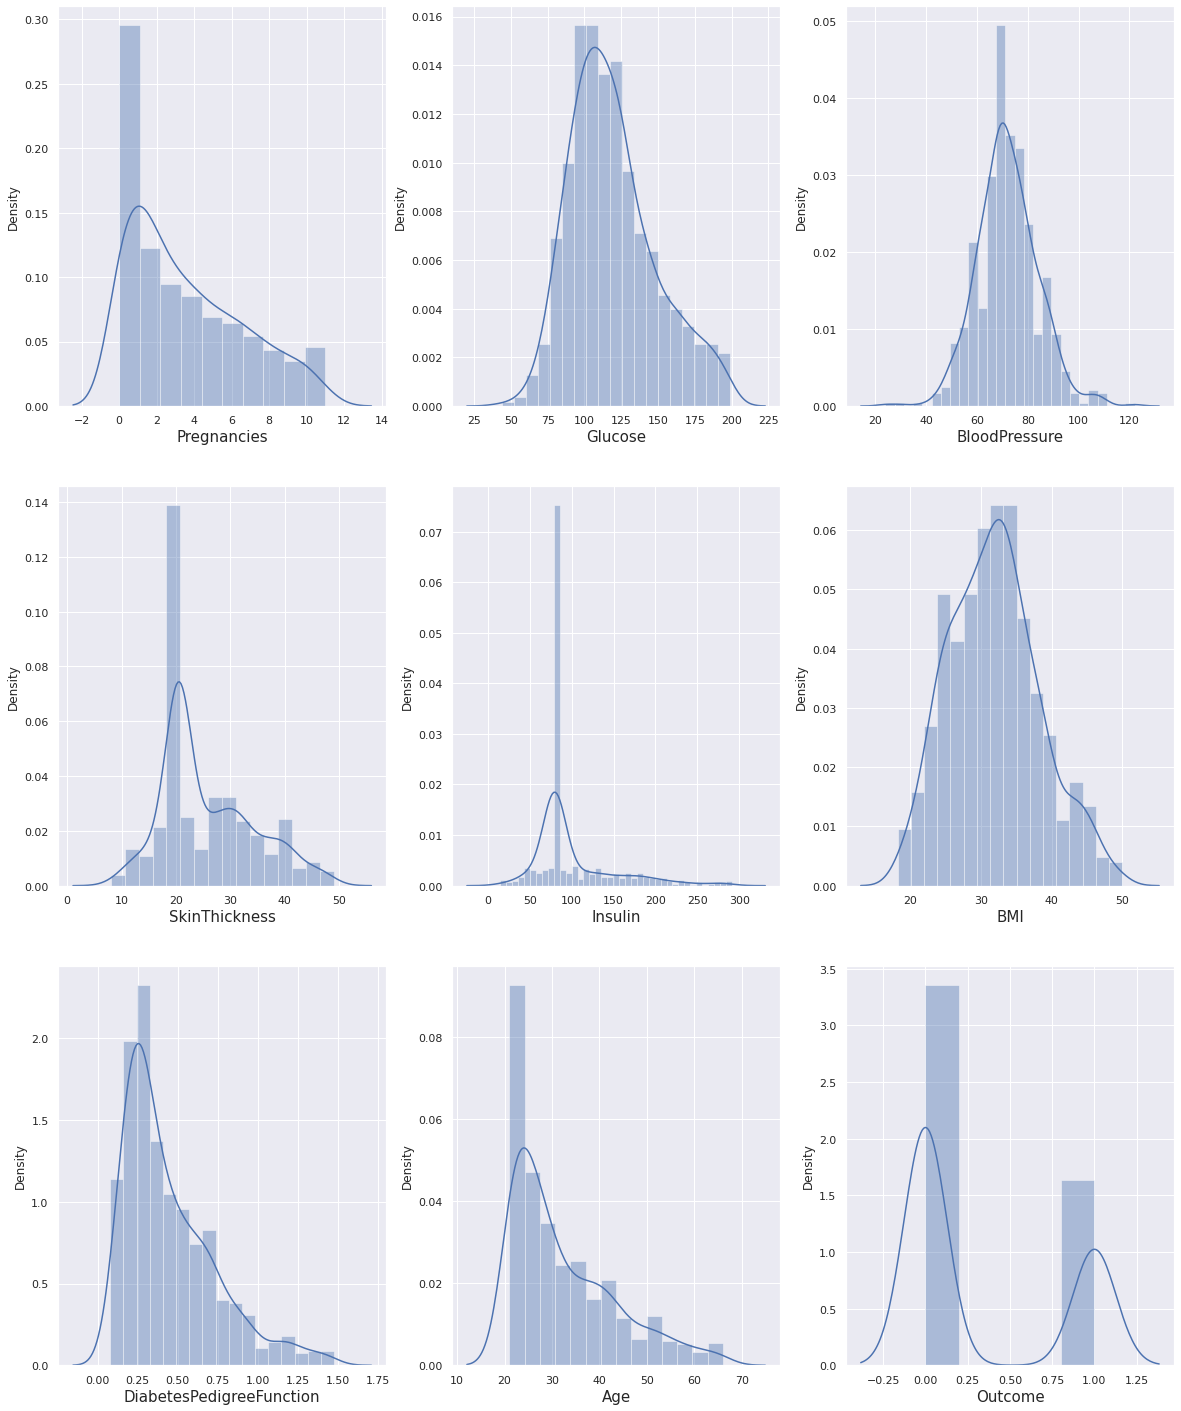

In [10]:
# again checking the data distribution

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

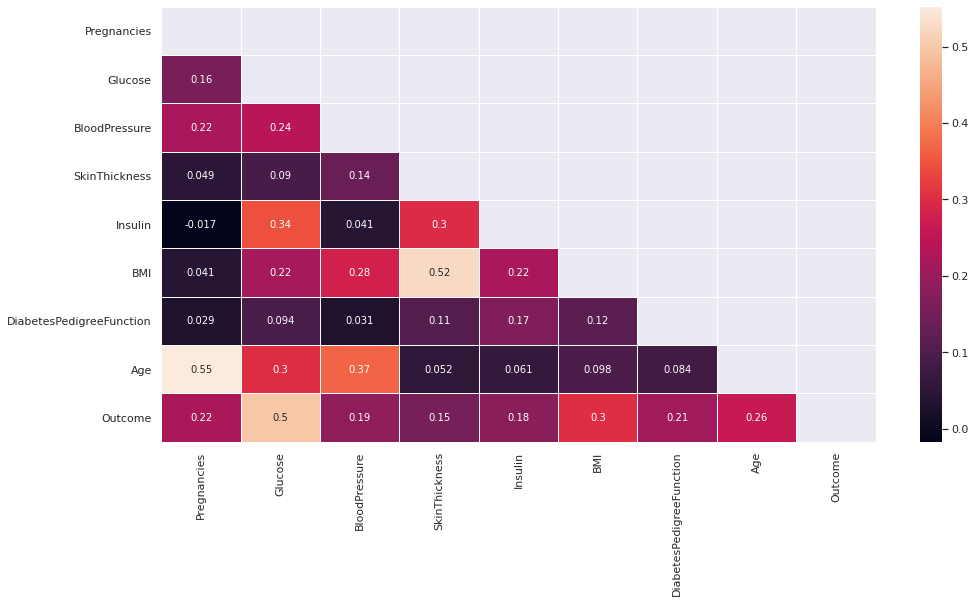

In [11]:
plt.figure(figsize = (16, 8))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [12]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [13]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
# scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# fitting data to model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.805940594059406
Test Accuracy of Logistic Regression Model is 0.7751479289940828


In [16]:
# confusion matrix 

confusion_matrix(y_test, y_pred)

array([[106,  11],
       [ 27,  25]])

In [17]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       117
           1       0.69      0.48      0.57        52

    accuracy                           0.78       169
   macro avg       0.75      0.69      0.71       169
weighted avg       0.77      0.78      0.76       169



## K Neighbors Classifier (KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.8376237623762376
Test Accuracy of KNN Model is 0.7514792899408284


In [19]:
# confusion matrix 

confusion_matrix(y_test, y_pred)

array([[103,  14],
       [ 28,  24]])

In [20]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       117
           1       0.63      0.46      0.53        52

    accuracy                           0.75       169
   macro avg       0.71      0.67      0.68       169
weighted avg       0.74      0.75      0.74       169



## Support Vector Classifier

In [21]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.8534653465346534
Test Accuracy of SVC Model is 0.7633136094674556


In [22]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[101,  16],
       [ 24,  28]])

In [23]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       117
           1       0.64      0.54      0.58        52

    accuracy                           0.76       169
   macro avg       0.72      0.70      0.71       169
weighted avg       0.76      0.76      0.76       169



## Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.7337278106508875


In [25]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[95, 22],
       [23, 29]])

In [26]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       117
           1       0.57      0.56      0.56        52

    accuracy                           0.73       169
   macro avg       0.69      0.68      0.69       169
weighted avg       0.73      0.73      0.73       169



In [27]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [28]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 3}
0.7683168316831683


In [29]:
dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.80990099009901
Test Accuracy of Decesion Tree Model is 0.7041420118343196


In [30]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[85, 32],
       [18, 34]])

In [31]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       117
           1       0.52      0.65      0.58        52

    accuracy                           0.70       169
   macro avg       0.67      0.69      0.67       169
weighted avg       0.73      0.70      0.71       169



## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.80990099009901
Test Accuracy of Random Forest Model is 0.7692307692307693


In [33]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[108,   9],
       [ 30,  22]])

In [34]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       117
           1       0.71      0.42      0.53        52

    accuracy                           0.77       169
   macro avg       0.75      0.67      0.69       169
weighted avg       0.76      0.77      0.75       169



## Boosting

### Ada Boost Classifier

In [35]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=9,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [36]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 120}
0.7742574257425743


In [37]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 0.001, n_estimators = 120)
ada.fit(X_train, y_train)

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Ada Boost Model is {ada_train_acc}")
print(f"Test Accuracy of Ada Boost Model is {ada_test_acc}")

Training Accuracy of Ada Boost Model is 0.80990099009901
Test Accuracy of Ada Boost Model is 0.7692307692307693


In [38]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[108,   9],
       [ 30,  22]])

In [39]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       117
           1       0.71      0.42      0.53        52

    accuracy                           0.77       169
   macro avg       0.75      0.67      0.69       169
weighted avg       0.76      0.77      0.75       169



## Gradient Boosting Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [41]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}
0.7643564356435644


In [42]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 150)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 0.9801980198019802
Test Accuracy of Gradient Boosting Classifier Model is 0.7810650887573964


In [43]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[103,  14],
       [ 23,  29]])

In [44]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       117
           1       0.67      0.56      0.61        52

    accuracy                           0.78       169
   macro avg       0.75      0.72      0.73       169
weighted avg       0.77      0.78      0.77       169



### Stochastic Gradient Boosting (SGB)

In [45]:
sgbc = GradientBoostingClassifier(learning_rate = 0.1, subsample = 0.9, max_features = 0.75, loss = 'deviance',
                                  n_estimators = 100)

sgbc.fit(X_train, y_train)

y_pred = sgbc.predict(X_test)

sgbc_train_acc = accuracy_score(y_train, sgbc.predict(X_train))
sgbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SGB Model is {sgbc_train_acc}")
print(f"Test Accuracy of SGB Model is {sgbc_test_acc}")

Training Accuracy of SGB Model is 0.9485148514851485
Test Accuracy of SGB Model is 0.7928994082840237


In [46]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[103,  14],
       [ 21,  31]])

In [47]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       117
           1       0.69      0.60      0.64        52

    accuracy                           0.79       169
   macro avg       0.76      0.74      0.75       169
weighted avg       0.79      0.79      0.79       169



### Cat Boost Classifier

In [48]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations = 30, learning_rate = 0.1)
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

0:	learn: 0.6685258	total: 52.4ms	remaining: 1.52s
1:	learn: 0.6473668	total: 53.9ms	remaining: 754ms
2:	learn: 0.6302430	total: 55.4ms	remaining: 499ms
3:	learn: 0.6100358	total: 56.7ms	remaining: 369ms
4:	learn: 0.5929452	total: 58.5ms	remaining: 292ms
5:	learn: 0.5788837	total: 60.3ms	remaining: 241ms
6:	learn: 0.5665110	total: 61.3ms	remaining: 201ms
7:	learn: 0.5560446	total: 62.2ms	remaining: 171ms
8:	learn: 0.5450193	total: 63ms	remaining: 147ms
9:	learn: 0.5351082	total: 63.9ms	remaining: 128ms
10:	learn: 0.5259947	total: 65ms	remaining: 112ms
11:	learn: 0.5173567	total: 66.1ms	remaining: 99.2ms
12:	learn: 0.5079918	total: 67.1ms	remaining: 87.8ms
13:	learn: 0.4997189	total: 68ms	remaining: 77.7ms
14:	learn: 0.4923370	total: 68.9ms	remaining: 68.9ms
15:	learn: 0.4855266	total: 69.8ms	remaining: 61.1ms
16:	learn: 0.4792526	total: 70.7ms	remaining: 54.1ms
17:	learn: 0.4727197	total: 73.1ms	remaining: 48.7ms
18:	learn: 0.4668655	total: 74.7ms	remaining: 43.3ms
19:	learn: 0.4619647

In [49]:

cat_train_acc = accuracy_score(y_train, cat.predict(X_train))
cat_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Cat Boost Classifier Model is {cat_train_acc}")
print(f"Test Accuracy of Cat Boost Classifier Model is {cat_test_acc}")

Training Accuracy of Cat Boost Classifier Model is 0.8198019801980198
Test Accuracy of Cat Boost Classifier Model is 0.7751479289940828


### Extreme Gradient Boosting (XGBoost) 

In [50]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, max_depth = 3, n_estimators = 10)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of XGB Model is {xgb_train_acc}")
print(f"Test Accuracy of XGB Model is {xgb_test_acc}")

[12:31:33] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:31:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy of XGB Model is 0.803960396039604
Test Accuracy of XGB Model is 0.7810650887573964


## Stacking

In [51]:
# let's divide our dataset into training set and holdout set by 50% 

from sklearn.model_selection import train_test_split

train, val_train, test, val_test = train_test_split(X, y, test_size = 0.5, random_state = 355)

In [52]:
# let's split the training set again into training and test dataset

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 355)

In [53]:
# using Logistic Regression and SVM algorithm as base models.
# Let's fit both of the models first on the X_train and y_train data.

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [54]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

Let's get the predictions of all the base models on the validation set val_train.

In [55]:
predict_val1 = lr.predict(val_train)
predict_val2 = svm.predict(val_train)

Let's stack the prediction values for validation set together as 'predict_val'

In [56]:
predict_val = np.column_stack((predict_val1, predict_val2))

Let's get the prediction of all the base models on test set X_set.

In [57]:
predict_test1 = lr.predict(X_test)
predict_test2 = svm.predict(X_test)

Let's stack the prediction values for validation set together as 'predict_set'

In [58]:
predict_test = np.column_stack((predict_test1, predict_test2))

Let's use the Stacked data 'predict_val' and val_test as the input feature for meta_model i.e. randomforest classifier.

In [59]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val, val_test)

RandomForestClassifier()

Let's check the accuracy of our meta_model using predict_test and y_test.

In [60]:
stacking_acc = accuracy_score(y_test, rand_clf.predict(predict_test))
print(stacking_acc)

0.8088235294117647


In [61]:
# confusion matrix

confusion_matrix(y_test, rand_clf.predict(predict_test))

array([[43,  5],
       [ 8, 12]])

In [62]:
# classification report

print(classification_report(y_test, rand_clf.predict(predict_test)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        48
           1       0.71      0.60      0.65        20

    accuracy                           0.81        68
   macro avg       0.77      0.75      0.76        68
weighted avg       0.80      0.81      0.80        68



#### Accuracy score increases a lot after use of stacking.

In [63]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boosting', 'SGB', 'XgBoost', 'Stacking', 'Cat Boost']
scores = [lr_test_acc, knn_test_acc, svc_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_test_acc, sgbc_test_acc, xgb_test_acc, stacking_acc, cat_test_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
9,Stacking,0.808824
7,SGB,0.792899
6,Gradient Boosting,0.781065
8,XgBoost,0.781065
0,Logistic Regression,0.775148
10,Cat Boost,0.775148
4,Random Forest,0.769231
5,Ada Boost,0.769231
2,SVC,0.763314
1,KNN,0.751479


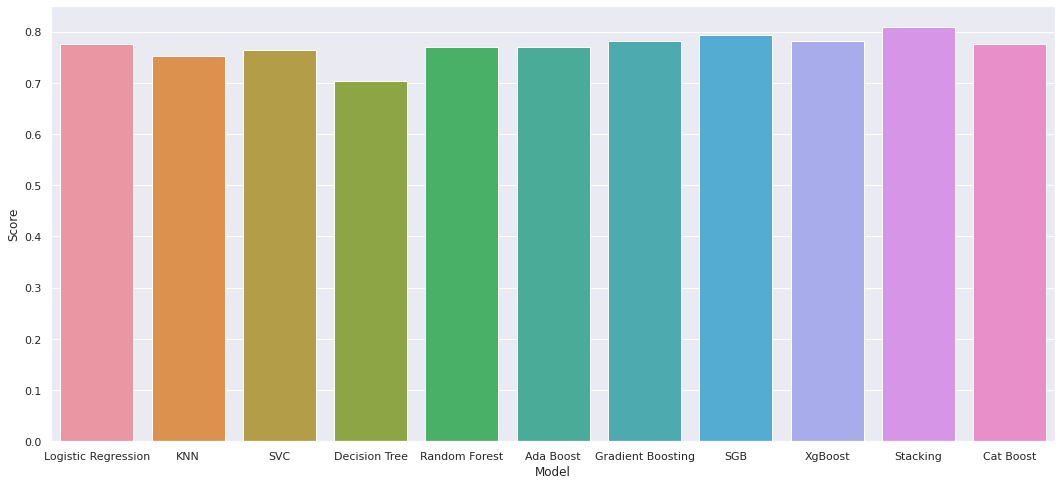

In [64]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

### We can see "Cat Boost" and "Stacking" is giving best results.

### If you like this kernel, please do a upvote.